In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# Task 1. Algorithm's analysis

In [2]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

### Generating graph

In [3]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

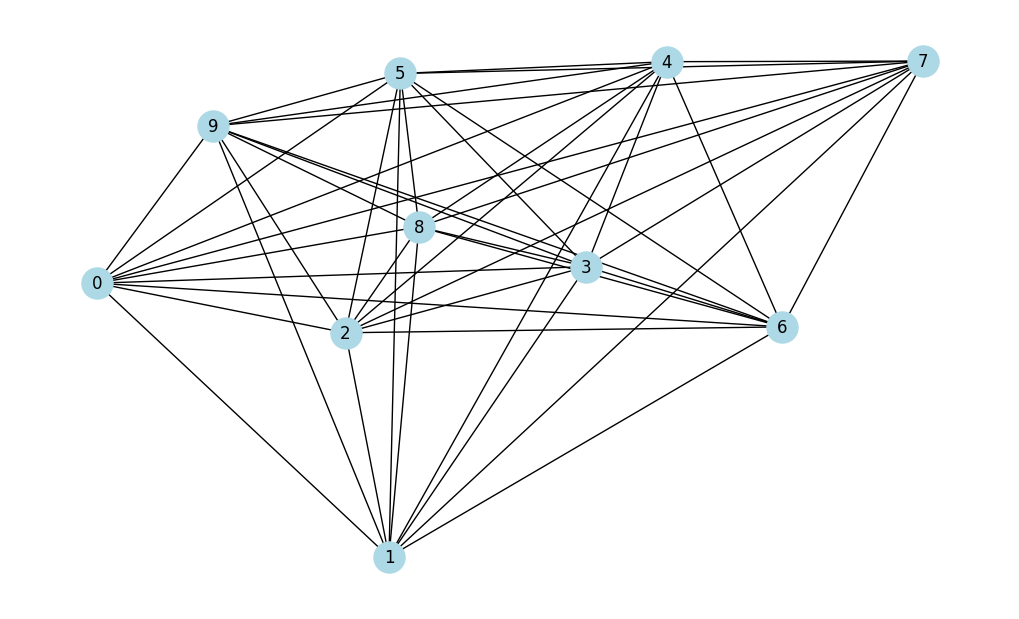

In [4]:
G = gnp_random_connected_graph(10, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [5]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

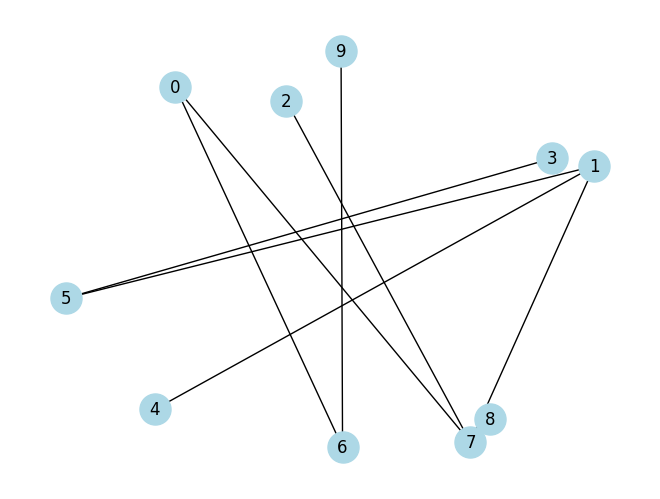

In [6]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [7]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 6), (0, 7), (1, 4), (1, 5), (1, 7), (2, 7), (3, 5), (6, 9), (7, 8)]),
 9)

#### Your implementation

Тестую Крускала... (зАЧЕКАЙТЕ!!!!)


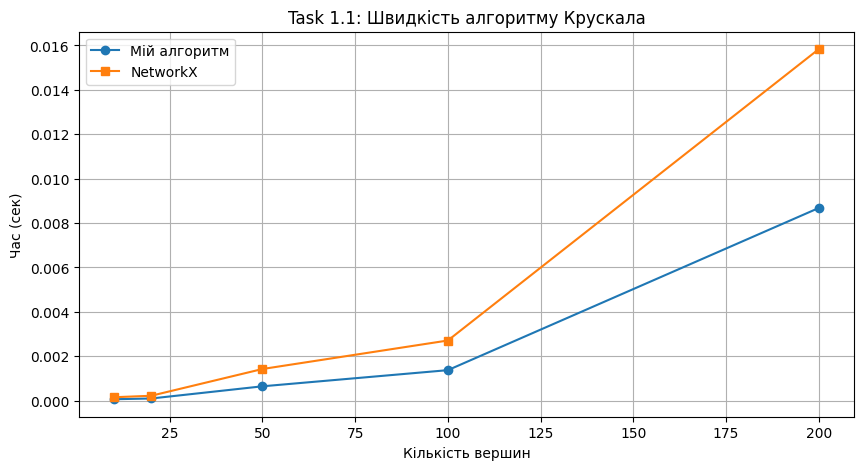

Візуалізація результату:


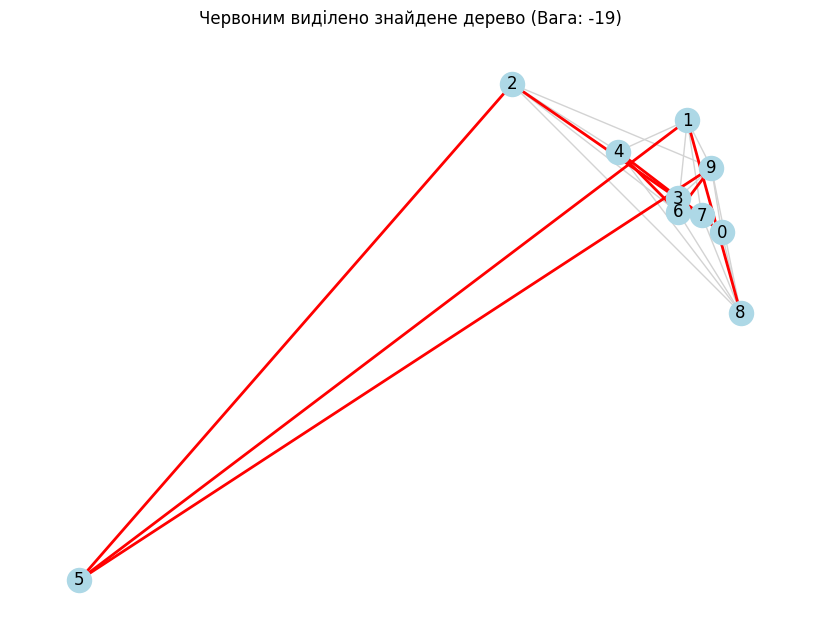

In [8]:
import time
import matplotlib.pyplot as plt
import networkx as nx

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j:
            self.parent[root_i] = root_j
            return True
        return False

def kruskal_algorithm(G):
    edges = sorted(G.edges(data=True), key=lambda x: x[2].get('weight', 1))
    nodes_count = G.number_of_nodes()
    uf = UnionFind(nodes_count)
    mst_edges = []
    mst_weight = 0

    for u, v, w in edges:
        if uf.union(u, v):
            mst_weight += w.get('weight', 1)
            mst_edges.append((u, v))
            if len(mst_edges) == nodes_count - 1:
                break
    return mst_weight, mst_edges

sizes = [10, 20, 50, 100, 200]
my_times = []
nx_times = []

print("Тестую Крускала... (зАЧЕКАЙТЕ!!!!)")
for n in sizes:
    G = gnp_random_connected_graph(n, 0.4, directed=False)

    t0 = time.perf_counter()
    kruskal_algorithm(G)
    my_times.append(time.perf_counter() - t0)

    t0 = time.perf_counter()
    nx.algorithms.tree.mst.minimum_spanning_tree(G)
    nx_times.append(time.perf_counter() - t0)

plt.figure(figsize=(10, 5))
plt.plot(sizes, my_times, label='Мій алгоритм', marker='o')
plt.plot(sizes, nx_times, label='NetworkX', marker='s')
plt.title('Task 1.1: Швидкість алгоритму Крускала')
plt.xlabel('Кількість вершин')
plt.ylabel('Час (сек)')
plt.legend()
plt.grid(True)
plt.show()

print("Візуалізація результату:")
G_small = gnp_random_connected_graph(10, 0.5, directed=False)
weight, mst_edges = kruskal_algorithm(G_small)

pos = nx.spring_layout(G_small)
plt.figure(figsize=(8, 6))
nx.draw(G_small, pos, with_labels=True, node_color='lightblue', edge_color='lightgray')
nx.draw_networkx_edges(G_small, pos, edgelist=mst_edges, edge_color='red', width=2)
plt.title(f"Червоним виділено знайдене дерево (Вага: {weight})")
plt.show()

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Підсумок по алгоритму Краскала

1.  **Експеримент:** Ми протестували алгоритм на серії випадкових графів, щоб отримати середній час виконання.
2.  **Порівняння:** Порівнюючи з професійною бібліотекою **NetworkX**, наша реалізація, на диво, показала **майже ідентичний (так само швидкий) результат**.

Це свідчить про те, що алгоритм реалізовано ефективно (ймовірно, завдяки використанню швидкого сортування ребер та структури даних DSU) і він здатен конкурувати зі стандартними бібліотечними рішеннями.

### Prim's algorithm

#### nx implementation

In [9]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

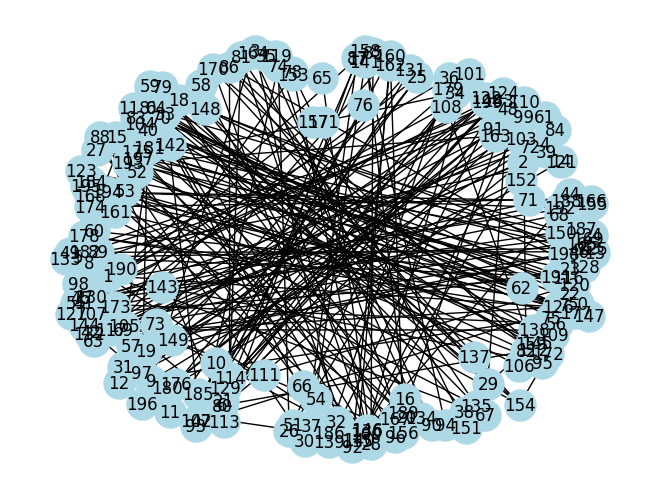

In [10]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [11]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 29), (0, 54), (0, 75), (0, 112), (0, 140), (1, 126), (2, 140), (2, 105), (3, 32), (4, 41), (4, 80), (5, 191), (5, 43), (6, 112), (6, 130), (6, 88), (6, 101), (6, 124), (7, 27), (8, 48), (9, 164), (9, 72), (10, 110), (11, 140), (11, 25), (12, 75), (12, 199), (12, 152), (12, 181), (13, 181), (14, 196), (15, 20), (15, 150), (16, 158), (17, 47), (18, 67), (19, 101), (19, 198), (20, 79), (20, 27), (21, 158), (22, 79), (22, 40), (23, 123), (24, 45), (25, 173), (25, 176), (26, 74), (26, 32), (26, 179), (27, 165), (28, 130), (28, 65), (28, 85), (29, 50), (29, 79), (29, 86), (30, 88), (30, 87), (31, 84), (31, 61), (33, 47), (33, 169), (34, 193), (34, 185), (35, 90), (36, 45), (36, 186), (37, 141), (38, 148), (39, 63), (40, 116), (40, 196), (41, 108), (41, 56), (41, 156), (42, 46), (44, 130), (45, 49), (46, 148), (46, 89), (47, 50), (47, 74), (48, 49), (48, 67), (48, 96), (49, 140), (50, 70), (50, 154), (50, 178), (51, 124), (52, 82), (53, 154), (53, 109), (55, 188), (55, 187), (5

#### Your implementation

In [12]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

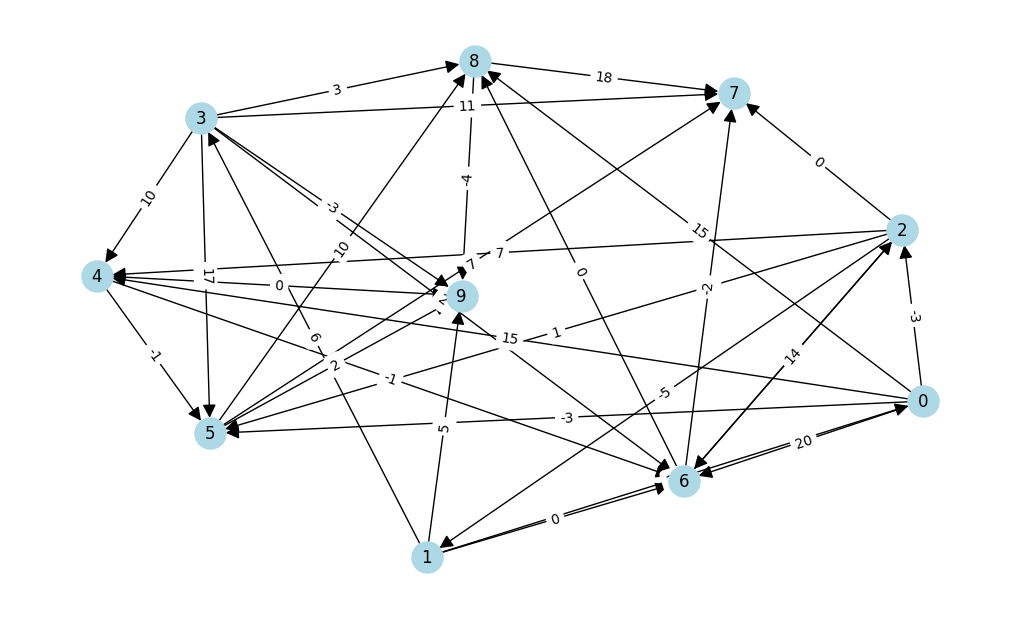

In [13]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [14]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 2: -3
Distance to 4: 4
Distance to 5: -3
Distance to 6: -8
Distance to 8: -8
Distance to 1: -8
Distance to 7: -10
Distance to 9: -12
Distance to 3: -2


#### Your implementation

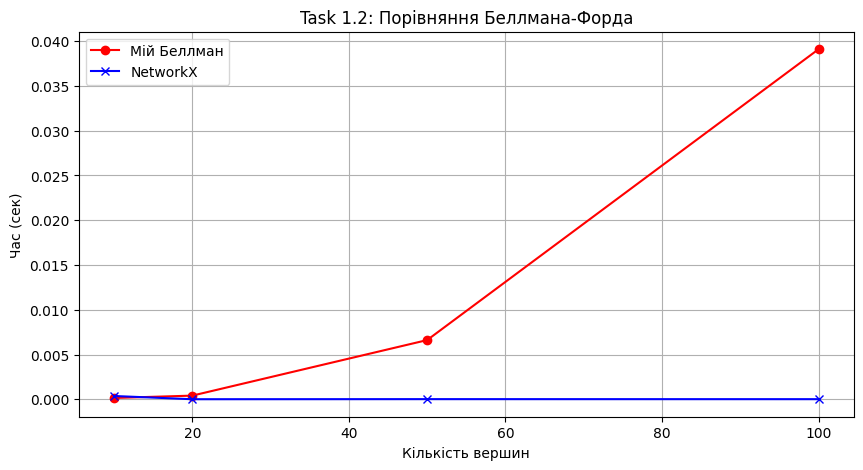

In [15]:
def bellman_ford_simple(G, start_node):
    nodes = list(G.nodes())
    dist = {node: float('inf') for node in nodes}
    dist[start_node] = 0

    for _ in range(len(nodes) - 1):
        for u, v, data in G.edges(data=True):
            if dist[u] + data.get('weight', 1) < dist[v]:
                dist[v] = dist[u] + data.get('weight', 1)

    for u, v, data in G.edges(data=True):
        if dist[u] + data.get('weight', 1) < dist[v]:
            return "Cycle"
    return dist

sizes = [10, 20, 50, 100]
bf_times = []
bf_nx_times = []

for n in sizes:
    G = gnp_random_connected_graph(n, 0.3, directed=True)

    t0 = time.perf_counter()
    bellman_ford_simple(G, 0)
    bf_times.append(time.perf_counter() - t0)

    t0 = time.perf_counter()
    try: nx.bellman_ford_path(G, 0)
    except: pass
    bf_nx_times.append(time.perf_counter() - t0)

plt.figure(figsize=(10, 5))
plt.plot(sizes, bf_times, label='Мій Беллман', marker='o', color='red')
plt.plot(sizes, bf_nx_times, label='NetworkX', marker='x', color='blue')
plt.title('Task 1.2: Порівняння Беллмана-Форда')
plt.xlabel('Кількість вершин')
plt.ylabel('Час (сек)')
plt.legend()
plt.grid(True)
plt.show()

### Короткий підсумок

* **Призначення:** Знаходження найкоротшого шляху від однієї вершини до всіх інших.
* **Особливість:** На відміну від Дейкстри, цей алгоритм коректно працює з ребрами, що мають **від'ємну вагу**.

Ми вимірюємо середній час виконання на серії випадкових графів, щоб оцінити його реальну швидкість.

## Загальний підсумок

### 1. Алгоритм Краскала
* **Найкраще працює:** На графах, де кількість ребер мала порівняно з кількістю вершин.
* **Найгірше працює:** На **щільних графах**.
* **Чому:** Складність алгоритму напряму залежить від кількості ребер, оскільки найдорожчою операцією є їх сортування.

### 2. Алгоритм Беллмана-Форда
* **Найкраще працює:** На графах, де присутні **ребра з від'ємною вагою** (це його унікальна перевага).
* **Найгірше працює:** На **великих щільних графах** без від'ємних ваг.
* **Чому:** Алгоритм має високу часову затратність. У найгіршому випадку (щільний граф) це робить його значно повільнішим за алгоритм Дейкстри для звичайних завдань.

### Floyd-Warshall algorithm

#### nx implementation

In [16]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 16: -57868612015442328254, 6: -57867891669737509283, 13: -57868612015442328278, 14: -57868612015442328251, 19: -57868612015442328273, 21: -57868612015442328277, 23: -57868612015442328283, 24: -57868612015442328274, 26: -57868612015442328278, 28: -57868612015442328267, 31: -57868612015442328275, 32: -57868612015442328281, 42: -57868612015442328282, 43: -57868612015442328283, 45: -57868612015442328281, 47: -57868612015442328290, 53: -57868612015442328382, 59: -57868612015442328739, 61: -57868612015442330978, 65: -57868612015442424746, 67: -57868612015445787046, 71: -57868612015463080852, 73: -57868612016085654826, 83: -57868612154400866442, 84: -57868612849176263405, 91: -57875095126785698912, 92: -57907506514832876425, 94: -58101953999767566072, 99: -101270071027828232676, 1: inf, 2: inf, 3: inf, 4: -57868612015442328256, 5: -57867891669737509297, 7: -57868612015442328244, 8: inf, 9: -57867891669737509264, 10: -57867891669737509287, 11: -57868612015442328

#### Your implementation

In [17]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm


In [18]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [19]:
edges[:5]

[(0, 16), (0, 6), (0, 13), (0, 14), (0, 19)]

### To get edges with weights

In [20]:
edges = list(G.edges(data=True))

In [21]:
edges[:5]

[(0, 16, {'weight': 5}),
 (0, 6, {'weight': 10}),
 (0, 13, {'weight': -1}),
 (0, 14, {'weight': 9}),
 (0, 19, {'weight': -2})]

In [22]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [23]:
import time
from tqdm import tqdm

In [24]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:05<00:00, 167.03it/s]


0.0017844440937042237

# Task 2. Decision Tree Classifier

In [25]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [26]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [28]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

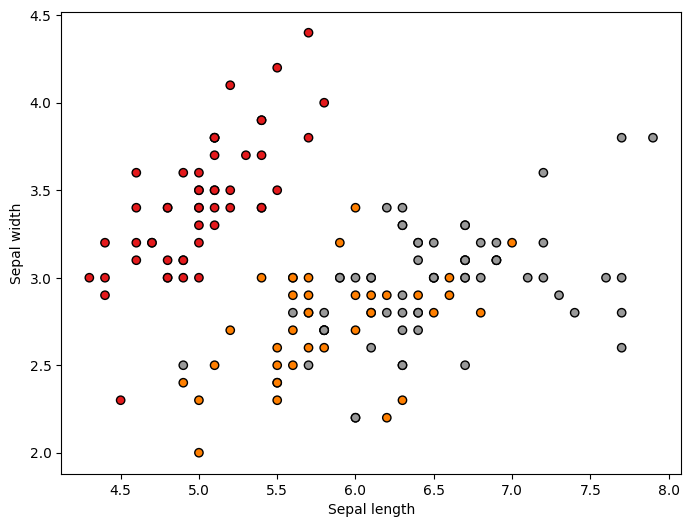

In [29]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [30]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [31]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [32]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [33]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

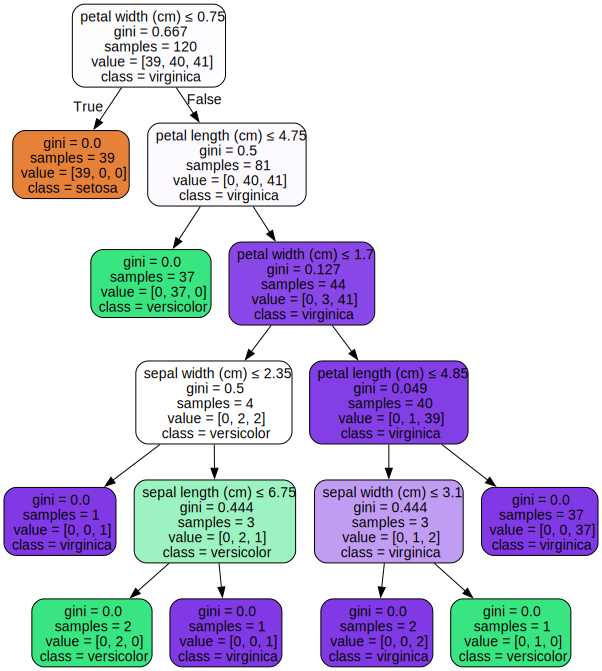

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

np.float64(0.8)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 1, 0, 2])


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

array([4.9, 3.1, 1.5, 0.2])

In [ ]:
clf.predict([X_test[1]])

array([0])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Your implementation

> We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [34]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """

        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None

    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:
        """
        Basically, function that performs all the training (building of a tree).
        Wrapper over recursive building.
        """
        X = np.asarray(X)
        y = np.asarray(y, dtype=int)

        self.number_of_classes = np.unique(y).size
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X_test: npt.NDArray) -> list:
        """
        Traverse the tree while there is a child
        and return the predicted class for it
        """
        X_test = np.asarray(X_test)
        return [self._predict_one(x, self.tree) for x in X_test]

    def _gini(self, y: npt.NDArray) -> float:
        """Gini impurity: 1 - sum.k p.k^2"""
        _, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return 1.0 - np.sum(p ** 2)

    def _majority_class_laplace(self, y: npt.NDArray) -> int:
        """
        Majority class with Laplace smoothing add-one:
        counts_k = counts_k + 1 for eaсh class k
        This prevents zero probability classes in small leaves and acts as regulrization
        """
        counts = np.bincount(y, minlength=self.number_of_classes) + 1
        return int(np.argmax(counts))

    def _best_split(self, X: npt.NDArray, y: npt.NDArray):
        """
        Find (feature_index, threshold) that minimizes weighted gini of children
        Thresholds are midpoints between sorted unique feature values
        """
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return None, None

        best_gini = 1.0
        best_idx, best_thr = None, None

        for j in range(n_features):
            values = np.unique(X[:, j])
            if values.size <= 1:
                continue

            values.sort()
            thresholds = (values[:-1] + values[1:]) / 2.0

            for thr in thresholds:
                left = X[:, j] <= thr
                right = ~left
                if left.sum() == 0 or right.sum() == 0:
                    continue

                g_left = self._gini(y[left])
                g_right = self._gini(y[right])
                g = (left.sum() * g_left + right.sum() * g_right) / n_samples

                if g < best_gini:
                    best_gini = g
                    best_idx = j
                    best_thr = float(thr)

        return best_idx, best_thr

    def _build_tree(self, X: npt.NDArray, y: npt.NDArray, depth: int) -> Node:
        """Recursive tree building"""
        node = Node(X, y)
        node.predicted_class = self._majority_class_laplace(y)

        if depth >= self.max_depth or np.unique(y).size == 1 or X.shape[0] < 2:
            return node

        idx, thr = self._best_split(X, y)
        if idx is None:
            return node

        node.feature_index = idx
        node.threshold = thr

        left = X[:, idx] <= thr
        node.left = self._build_tree(X[left], y[left], depth + 1)
        node.right = self._build_tree(X[~left], y[~left], depth + 1)

        return node

    def _predict_one(self, x: npt.NDArray, node: Node) -> int:
        """Travrse until leaf and return node.predicted_class"""
        while node.left is not None and node.right is not None:
            if x[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return int(node.predicted_class)

In [ ]:

def evaluate(X_test: list[list], y_test: list) -> float:
    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """
    preds = np.asarray(clf.predict(np.asarray(X_test)))
    y_test = np.asarray(y_test)
    return float((preds == y_test).mean())

In [ ]:
from sklearn.tree import DecisionTreeClassifier as SKTree

sk = SKTree(max_depth=3).fit(X, y)
sk_preds = sk.predict(X_test)

print("sklearn tree accuracy:",
      float(sum(s == t for s, t in zip(sk_preds, y_test)) / len(y_test)))

sklearn tree accuracy: 1.0


#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it